3.996014448137699 3.9988514405060753
[3.99903256e+00 3.99613119e+00 3.99129870e+00 3.98453974e+00
 3.97586088e+00 3.96527050e+00 3.95277884e+00 9.67435416e-04
 3.86880573e-03 8.70130406e-03 1.90671922e+00 1.84463231e+00
 1.96889638e+00 2.03110362e+00 2.09328078e+00 3.93839800e+00
 2.15536769e+00 1.78269570e+00 1.54602553e-02 2.21730430e+00
 1.65951289e+00 2.40161415e+00 2.34048711e+00 1.59838585e+00
 1.53764736e+00 2.46235264e+00 2.41391205e-02 3.90402622e+00
 1.47735615e+00 3.88406853e+00 2.52264385e+00 3.86228812e+00
 3.47295036e-02 1.41757058e+00 3.83870608e+00 4.72211589e-02
 2.58242942e+00 1.35834846e+00 6.16020016e-02 1.29974710e+00
 3.81334520e+00 2.64165154e+00 3.78623003e+00 1.24182319e+00
 2.70025290e+00 1.15931473e-01 9.59737849e-02 1.37711876e-01
 3.75738680e+00 2.75817681e+00 1.61293922e-01 1.07267294e+00
 9.64300750e-01 1.01801184e+00 9.11591634e-01 1.86654798e-01
 2.87176884e+00 2.92732706e+00 3.08840837e+00 3.14006452e+00
 3.19061773e+00 3.03569925e+00 8.59935484e-01 2.

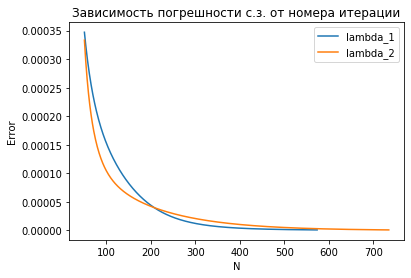

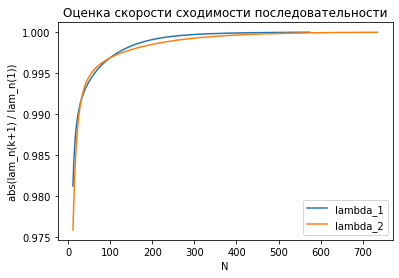

In [16]:
import numpy as np
import matplotlib.pyplot as plt

k1 = []
lst_error1 = []
k2 = []
lst_error2 = []

lst_lam1 = []
lst_lam2 = []
v1 = []
v2 = []

def rqi(A, eps):
    I = np.identity(A.shape[0])
    u = np.random.randn(A.shape[0]) # u(0)
    temp1 = 0
    k = 0
    while True:
        lam1 = np.dot(np.dot(A, u), u) / np.dot(u, u) # lambda_1(k) = (A*u(k),u(k)) / (u(k),u(k))
        u = np.dot(A, u) # u(k+1) = A * u(k)
        u /= np.linalg.norm(u) # u(k+1) = u(k+1) / norm(u(k+1)) 
        lst_lam1.append(lam1)
        error1 = lam1 - temp1
        lst_error1.append(error1)
        k += 1
        k1.append(k)
        if error1 < eps:
            break
        temp1 = lam1
    u2 = np.random.randn(A.shape[0])
    temp2 = 0
    k = 0
    while True:
        u2 = np.dot(I, u2) - np.dot(u, np.dot(u, u2))
        A2 = A - lam1 * np.dot(u, np.dot(u, u2))
        lam2 = np.dot(np.dot(A2, u2), u2) / np.dot(u2, u2) 
        u2 = np.dot(A2, u2) 
        u2 /= np.linalg.norm(u2)
        lst_lam2.append(lam2)
        error2 = lam2 - temp2
        lst_error2.append(error2)
        k += 1
        k2.append(k)
        if error2 < eps:
            break
        temp2 = lam2
    return lam1, lam2

A = 2 * np.eye(100) - np.eye(100, k=1) - np.eye(100, k=-1)
#print(A , "\n")

lam1, lam2 = rqi(A, 10**-6)
print(lam1, lam2)
print(np.linalg.eigvals(A))

for i in range(len(lst_lam1)):
    v1.append(abs(lst_lam1[i] / lam1))
for i in range(len(lst_lam2)):
    v2.append(abs(lst_lam2[i] / lam2))

fig = plt.figure()
plt.plot(k1[50:],lst_error1[50:],label='lambda_1')
plt.plot(k2[50:],lst_error2[50:],label='lambda_2')
plt.title("Зависимость погрешности с.з. от номера итерации") 
plt.xlabel("N")
plt.ylabel("Error")
plt.legend() 


fig = plt.figure()
plt.plot(k1[10:],v1[10:],label='lambda_1')
plt.plot(k2[10:],v2[10:],label='lambda_2')
plt.title("Оценка скорости сходимости последовательности") 
plt.xlabel("N")
plt.ylabel("abs(lam_n(k+1) / lam_n(1))")
plt.legend() 


0.0009705670368414451
[0.001309174053392065, 0.0009705670368414451]
[3.99903256e+00 3.99613119e+00 3.99129870e+00 3.98453974e+00
 3.97586088e+00 3.96527050e+00 3.95277884e+00 9.67435416e-04
 3.86880573e-03 8.70130406e-03 1.90671922e+00 1.84463231e+00
 1.96889638e+00 2.03110362e+00 2.09328078e+00 3.93839800e+00
 2.15536769e+00 1.78269570e+00 1.54602553e-02 2.21730430e+00
 1.65951289e+00 2.40161415e+00 2.34048711e+00 1.59838585e+00
 1.53764736e+00 2.46235264e+00 2.41391205e-02 3.90402622e+00
 1.47735615e+00 3.88406853e+00 2.52264385e+00 3.86228812e+00
 3.47295036e-02 1.41757058e+00 3.83870608e+00 4.72211589e-02
 2.58242942e+00 1.35834846e+00 6.16020016e-02 1.29974710e+00
 3.81334520e+00 2.64165154e+00 3.78623003e+00 1.24182319e+00
 2.70025290e+00 1.15931473e-01 9.59737849e-02 1.37711876e-01
 3.75738680e+00 2.75817681e+00 1.61293922e-01 1.07267294e+00
 9.64300750e-01 1.01801184e+00 9.11591634e-01 1.86654798e-01
 2.87176884e+00 2.92732706e+00 3.08840837e+00 3.14006452e+00
 3.19061773e+00 3

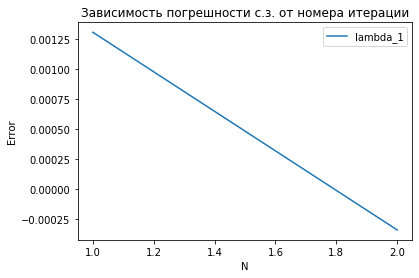

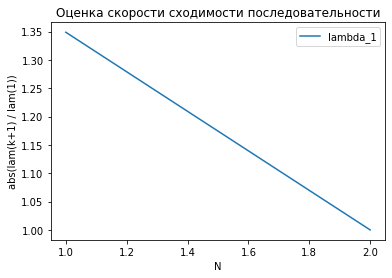

In [208]:
import numpy as np
import matplotlib.pyplot as plt

k1 = []
lst_error1 = []

lst_lam1 = []
v1 = []

def rqi(A, eps):
    I = np.identity(A.shape[0])
    u = np.random.randn(A.shape[0]) # u(0)
    u /= np.linalg.norm(u)
    temp1 = 0
    k = 0
    mu = 0  
    while True:
        u = np.linalg.solve(A - mu * I, u)
        mu = np.dot(np.dot(A, u), u) / np.dot(u, u)
        u /= np.linalg.norm(u)
        lst_lam1.append(mu)
        error1 = mu - temp1
        lst_error1.append(error1)
        k += 1
        k1.append(k)
        if error1 < eps:
            break
        temp1 = mu
    return mu

A = 2 * np.eye(100) - np.eye(100, k=1) - np.eye(100, k=-1)
#print(A , "\n")

mu = rqi(A, 10**-6)
print(mu)
print(lst_lam1)
print(np.linalg.eigvals(A))

for i in range(len(lst_lam1)):
    v1.append(abs(lst_lam1[i] / mu))

fig = plt.figure()
plt.plot(k1,lst_error1,label='lambda_1')
plt.title("Зависимость погрешности с.з. от номера итерации") 
plt.xlabel("N")
plt.ylabel("Error")
plt.legend() 

fig2 = plt.figure()
plt.plot(k1,v1,label='lambda_1')
plt.title("Оценка скорости сходимости последовательности") 
plt.xlabel("N")
plt.ylabel("abs(lam(k+1) / lam(1))")
plt.legend() 